In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate mock data for child order performance
np.random.seed(42)

num_orders = 500

data = {
    "Order_ID": np.arange(1, num_orders + 1),
    "Venue": np.random.choice(["NYSE", "NASDAQ", "LSE", "BATS", "Cboe"], num_orders),
    "Execution_Price": np.random.uniform(99, 101, num_orders),
    "Benchmark_Price": np.random.uniform(99, 101, num_orders),
    "Order_Size": np.random.randint(100, 1000, num_orders),
    "Fill_Rate": np.random.uniform(0.5, 1.0, num_orders),  # Between 50% to 100%
    "Latency_ms": np.random.uniform(10, 100, num_orders),  # Latency in milliseconds
    "Slippage": np.random.uniform(-0.05, 0.05, num_orders),  # Slippage relative to benchmark
    "Rejection_Flag": np.random.choice([0, 1], num_orders, p=[0.95, 0.05])  # 5% rejection rate
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate additional metrics
df["Execution_Cost"] = (df["Execution_Price"] - df["Benchmark_Price"]) * df["Order_Size"]
df["Execution_Cost"] = df["Execution_Cost"].round(2)

# Aggregate performance by venue
venue_performance = df.groupby("Venue").agg(
    Avg_Execution_Price=("Execution_Price", "mean"),
    Avg_Benchmark_Price=("Benchmark_Price", "mean"),
    Avg_Fill_Rate=("Fill_Rate", "mean"),
    Avg_Latency_ms=("Latency_ms", "mean"),
    Avg_Slippage=("Slippage", "mean"),
    Total_Orders=("Order_ID", "count"),
    Rejection_Rate=("Rejection_Flag", "mean")
).reset_index()

# Convert rejection rate to percentage
venue_performance["Rejection_Rate"] *= 100

# Round values for better readability
venue_performance = venue_performance.round(3)

# Display table to the user
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Venue Performance Summary", dataframe=venue_performance)
venue_performance


,Venue,Avg_Execution_Price,Avg_Benchmark_Price,Avg_Fill_Rate,Avg_Latency_ms,Avg_Slippage,Total_Orders,Rejection_Rate
0,BATS,100.033,100.010,0.749,52.925,-0.004,112,4.464
1,Cboe,100.073,100.043,0.764,51.737,-0.004,93,3.226
2,LSE,99.879,100.000,0.736,50.882,0.007,91,3.297
3,NASDAQ,100.036,99.969,0.739,58.026,0.001,95,7.368
4,NYSE,99.876,100.059,0.756,56.954,0.002,109,1.835


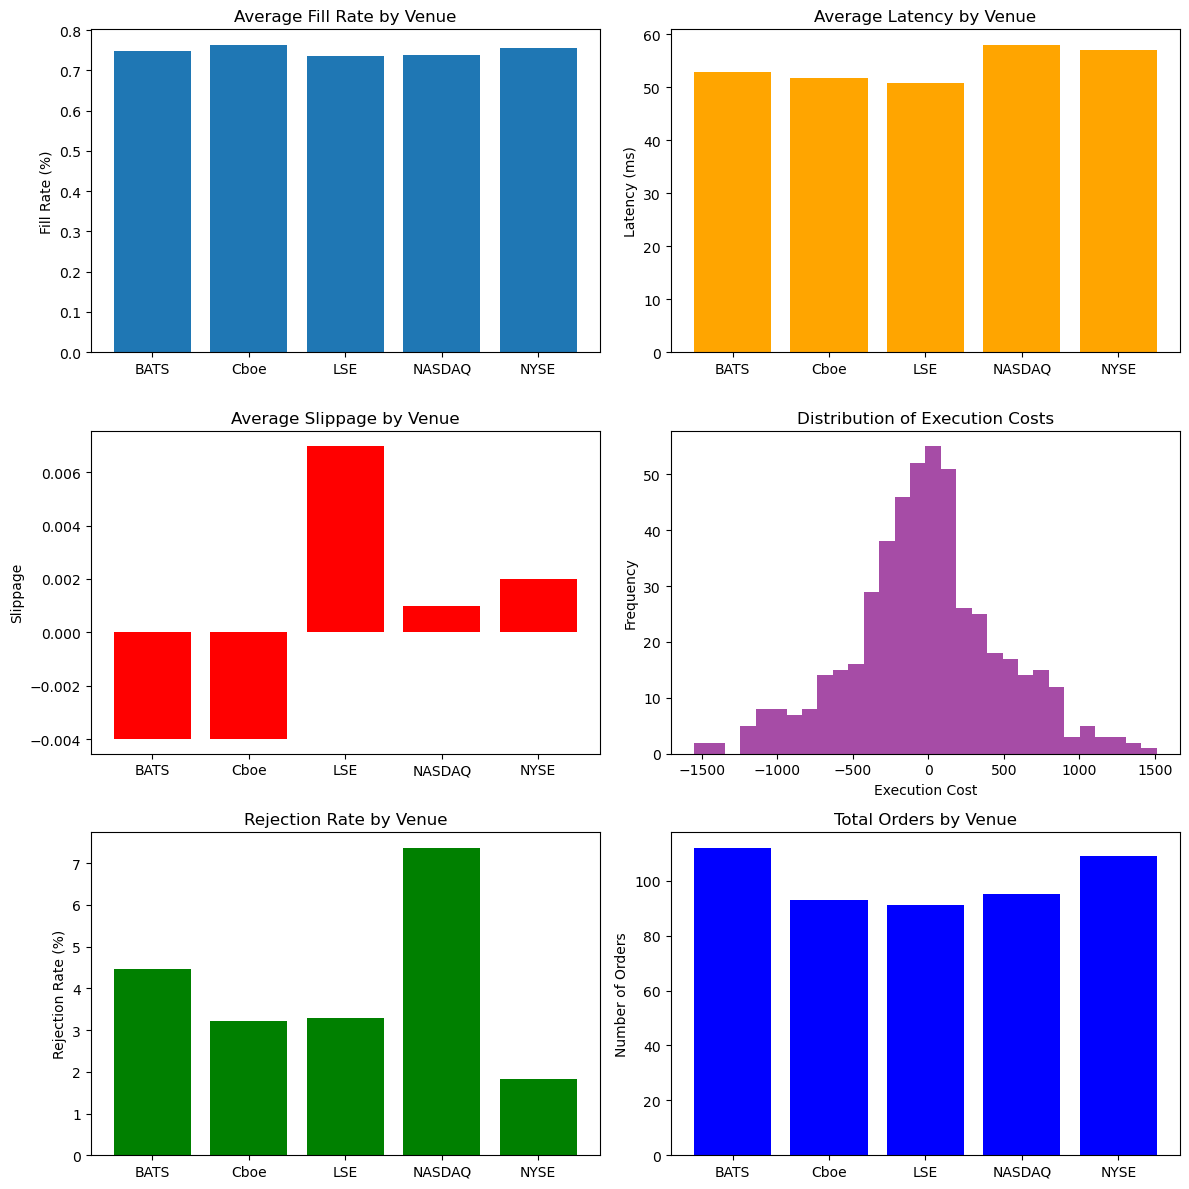

In [10]:

# Plot performance metrics
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Fill Rate per Venue
axes[0, 0].bar(venue_performance["Venue"], venue_performance["Avg_Fill_Rate"])
axes[0, 0].set_title("Average Fill Rate by Venue")
axes[0, 0].set_ylabel("Fill Rate (%)")

# Latency per Venue
axes[0, 1].bar(venue_performance["Venue"], venue_performance["Avg_Latency_ms"], color='orange')
axes[0, 1].set_title("Average Latency by Venue")
axes[0, 1].set_ylabel("Latency (ms)")

# Slippage per Venue
axes[1, 0].bar(venue_performance["Venue"], venue_performance["Avg_Slippage"], color='red')
axes[1, 0].set_title("Average Slippage by Venue")
axes[1, 0].set_ylabel("Slippage")

# Execution Cost Distribution
axes[1, 1].hist(df["Execution_Cost"], bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title("Distribution of Execution Costs")
axes[1, 1].set_xlabel("Execution Cost")
axes[1, 1].set_ylabel("Frequency")

# Rejection Rate per Venue
axes[2, 0].bar(venue_performance["Venue"], venue_performance["Rejection_Rate"], color='green')
axes[2, 0].set_title("Rejection Rate by Venue")
axes[2, 0].set_ylabel("Rejection Rate (%)")

# Order Volume per Venue
axes[2, 1].bar(venue_performance["Venue"], venue_performance["Total_Orders"], color='blue')
axes[2, 1].set_title("Total Orders by Venue")
axes[2, 1].set_ylabel("Number of Orders")

plt.tight_layout()
plt.show()
